# COGS 138 Final Project

## Names

- Fatima Enriquez
- Ashley Chavarria
- Tiffany Gunawan
- Hiroki Ito

## Reseach Question

How does the pattern of brain atrophy differ between patients with Alzheimer’s disease and healthy controls, and can these differences be used to prototype a predictive model to predict disease progression?

## Background & Prior Work

Our group’s decision to focus on brain atrophy in Alzheimer’s patients is per our discussion for a need to create better diagnostic and prognostic tools in managing this debilitating condition. Alzheimer's is a very common type of dementia with progressive symptoms, starting with mild memory loss and possibly leading to the loss of ability to carry on a conversation and respond to your general surroundings. According to the CDC, scientists do not fully know what causes Alzheimer’s disease, but there are multiple factors that can affect each person differently: age, family history, changes in the brain, and possibly education, diet, and environment. Most of what is known are the symptoms of Alzheimer’s, typically regarding memory problems being the first warning sign followed by difficulty completing familiar tasks, misplacing things, and changes in mood and behavior. [(CDC, 2020)](https://www.cdc.gov/aging/aginginfo/alzheimers.htm)

From what we knew before, there is no single test that can determine if a person is living with Alzheimer’s. Doctors employ a range of diagnostic methods for diagnosing including an integration of medical history, neurological exams, cognitive assessments, brain imaging, and blood examinations to make an accurate diagnosis. Recently, however, there has been a new usage of biomarkers to help diagnose Alzheimer’s disease, particularly focusing on brain imaging. According to the National Institute on Aging, brain scans are allowing doctors to see different factors that may help in diagnosis via CT, MRI, and PET scan. [(NIA, 2022)](https://www.nia.nih.gov/health/alzheimers-symptoms-and-diagnosis/how-biomarkers-help-diagnose-dementia#types_biomarkers_tests) Our group specifically wanted to focus on MRI for this project due to its versatility. 
    
Magnetic resonance imaging is a noninvasive technique that uses magnetic fields and radio waves to produce detailed images of body structures, and similar to CT scans, MRIs can show areas of the brain that have shrunk. Additionally, repeated MRIs can show a person’s brain changes over time, which may lead to evidence of shrinkage and can be used in many diagnoses. [(John Hopkins Medicine, 2024)](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/magnetic-resonance-imaging-mri) This has our group wondering, if MRIs can be used to note shrinkage in the brain, and according to the NIA, Alzheimer’s results as neuronal death which can affect the brain via tissue death and shrinkage, then we can possibly use MRI as a predictive method for Alzheimer's disease.

For this project, we chose to separate it into two parts. 

1. Comparisons in normal brain volume and demented brain volume
2. Computer vision application of multiple fMRI images of patients to prototype a predictive model for the prediction of Alzheimer's Disease

## Installations

In [1]:
#pip install Pillow

In [2]:
pip install opencv-python

     --------------------------------------- 38.6/38.6 MB 43.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Imports: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from PIL import Image
import glob, os

from pathlib import Path
import imghdr

import cv2
import os
from pathlib import Path

## Data Overview: 

The dataset below is the exact same as the oasis datasets...

#### Dataset #1
- Name: Oasis_cross_sectional
- Link to dataset: https://sites.wustl.edu/oasisbrains/home/oasis-1/
- Number of observations: 436
- Number of variables: 12
- Variables of interest: gender (M/F), volume (eTIV, nWBV)

In [4]:
oasis_cross_sectional=pd.read_csv('oasis_cross-sectional.csv')


KeyboardInterrupt



In [ ]:
oasis_cross_sectional.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [ ]:
oasis_cross_sectional.shape

(436, 12)

In [ ]:
oasis_cross_sectional.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [ ]:
oasis_cross_sectional.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [ ]:
# Since we only care about sex and brain volume, we will drop all other columns
# We will also arrange our dataset on the 'M/F' column for easier merging

oasis_cross_sectional=oasis_cross_sectional.drop(columns=['Age','Hand', 'Educ', 'SES', 'MMSE', 'CDR', 'ASF', 'Delay', 'eTIV'])
oasis_cross_sectional=oasis_cross_sectional.sort_values('M/F', ascending=False)
oasis_cross_sectional.head()

,ID,M/F,nWBV
134,OAS1_0144_MR1,M,0.865
119,OAS1_0129_MR1,M,0.846
121,OAS1_0131_MR1,M,0.824
122,OAS1_0132_MR1,M,0.850
300,OAS1_0332_MR1,M,0.762


In [ ]:
# Descriptive statistics for nWBV
# Note the lowest brain volume detected was 0.644 and the max was 0.89 between male and female

oasis_cross_sectional.describe(include=[np.number])

,nWBV
count,436.000000
mean,0.791670
std,0.059937
min,0.644000
25%,0.742750
50%,0.809000
75%,0.842000
max,0.893000


#### Dataset #2
- Name: Oasis_longitudinal_demographics
- Link to dataset: https://sites.wustl.edu/oasisbrains/home/oasis-2/
- Number of observations: 373
- Number of variables: 15
- Variables of interst: demented/nondemented (Group), gender (M/F), age (Age), volume (eTIV, nWBV)

In [ ]:
oasis_longitudinal_demographics=pd.read_csv('oasis_longitudinal_demographics.csv')

In [ ]:
oasis_longitudinal_demographics.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
oasis_longitudinal_demographics.shape

(373, 15)

In [ ]:
oasis_longitudinal_demographics.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [ ]:
oasis_longitudinal_demographics.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
# Since we only care about sex and brain volume, we will drop all other columns
# Removing rows of nondemented patients, as our focus is on people who are already demented
# We will also arrange our dataset on the 'M/F' column for easier merging

oasis_longitudinal_demographics=oasis_longitudinal_demographics[oasis_longitudinal_demographics['Group'] != 'Nondemented']
oasis_longitudinal_demographics=oasis_longitudinal_demographics.drop(columns=['Subject ID', 'Group','Age', 'Visit', 'MR Delay', 'Hand', 'EDUC', 'SES', 'MMSE', 'CDR', 'ASF', 'eTIV'])
oasis_longitudinal_demographics=oasis_longitudinal_demographics.sort_values('M/F', ascending=False)
oasis_longitudinal_demographics.head()

,MRI ID,M/F,nWBV
2,OAS2_0002_MR1,M,0.736
123,OAS2_0058_MR1,M,0.707
261,OAS2_0127_MR1,M,0.729
257,OAS2_0124_MR2,M,0.750
256,OAS2_0124_MR1,M,0.749


In [ ]:
# Renaming columns to match

oasis_longitudinal_demographics=oasis_longitudinal_demographics.rename(columns={'MRI ID':'ID'})

In [ ]:
# Descriptive statistics for nWBV
# Note the lowest brain volume detected was 0.646 and the max was 0.81 between male and female

oasis_longitudinal_demographics.describe(include=[np.number])

,nWBV
count,183.000000
mean,0.717803
std,0.032696
min,0.646000
25%,0.695000
50%,0.713000
75%,0.738000
max,0.806000


In the cell below, to make the dataset easier to work with, we will merge the dataset between the 'M/F' and 'nWBV' columns. This will give us a combined view fo teh gender and normalied brain volume data, allowing streamlined analysis and comparisons across these attributes.

In [ ]:
# Merging the two datasets on sex and brain volume

brain_volume = pd.merge(oasis_cross_sectional, oasis_longitudinal_demographics, on=['M/F', 'nWBV'])
brain_volume

,ID_x,M/F,nWBV,ID_y
0,OAS1_0134_MR1,M,0.665,OAS2_0162_MR2
1,OAS1_0351_MR1,M,0.665,OAS2_0162_MR2
2,OAS1_0399_MR1,M,0.706,OAS2_0058_MR2
3,OAS1_0399_MR1,M,0.706,OAS2_0037_MR4
4,OAS1_0138_MR1,M,0.706,OAS2_0058_MR2
...,...,...,...,...
121,OAS1_0221_MR1,F,0.696,OAS2_0018_MR4
122,OAS1_0221_MR1,F,0.696,OAS2_0079_MR3
123,OAS1_0221_MR1,F,0.696,OAS2_0031_MR3
124,OAS1_0210_MR1,F,0.722,OAS2_0106_MR1


## Exploratory Analysis

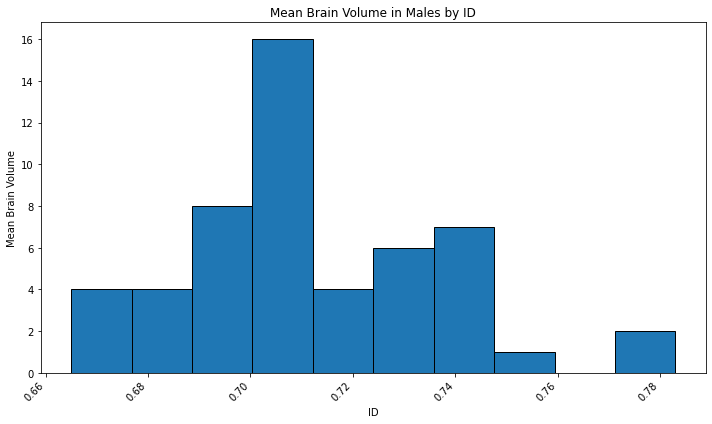

In [ ]:
male_data=brain_volume[brain_volume['M/F']=='M']
mean_nWBV=male_data.groupby(['ID_x', 'ID_y'])['nWBV'].mean()
plt.figure(figsize=(10, 6))
mean_nWBV.plot(kind='hist', edgecolor='black')
plt.xlabel('ID')
plt.ylabel('Mean Brain Volume')
plt.title('Mean Brain Volume in Males by ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

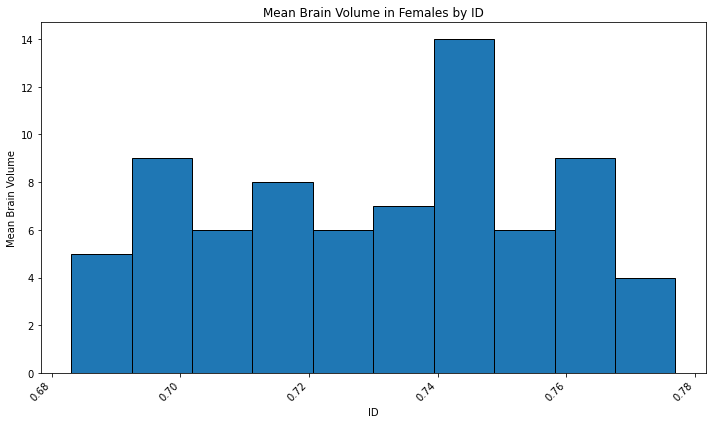

In [ ]:
female_data=brain_volume[brain_volume['M/F']=='F']
mean_nWBV=female_data.groupby(['ID_x', 'ID_y'])['nWBV'].mean()
plt.figure(figsize=(10, 6))
mean_nWBV.plot(kind='hist', edgecolor='black')
plt.xlabel('ID')
plt.ylabel('Mean Brain Volume')
plt.title('Mean Brain Volume in Females by ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    brain_volume[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(brain_volume[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


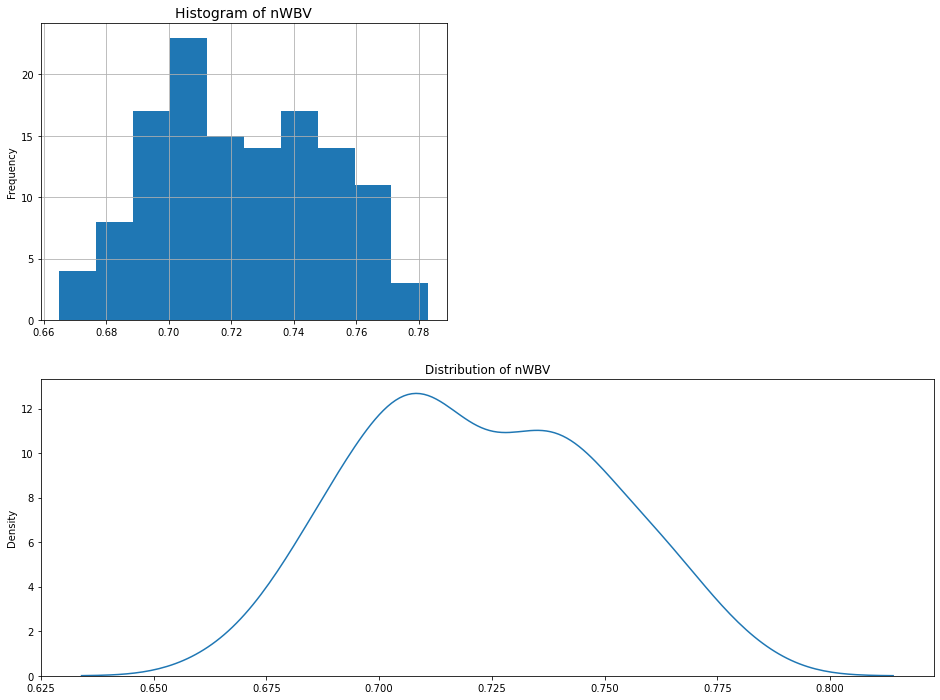

count    52.000000
mean      0.711327
std       0.025152
min       0.665000
25%       0.695000
50%       0.709000
75%       0.728000
max       0.783000
Name: nWBV, dtype: float64

In [ ]:
# From the univariate analysis, we can see that males with dementia commonly have a brain volume of 0.70 +/- (x)

univariate_mul('nWBV')
male_data['nWBV'].describe()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


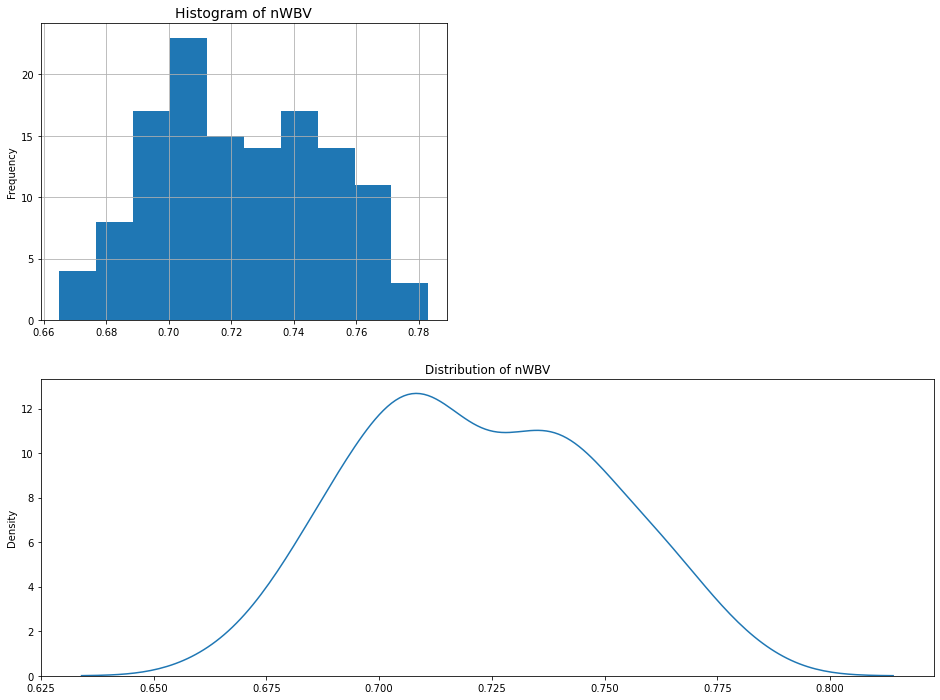

count    74.000000
mean      0.730446
std       0.025915
min       0.683000
25%       0.708000
50%       0.733000
75%       0.751000
max       0.777000
Name: nWBV, dtype: float64

In [ ]:
# From the univariate analysis, we can see that females with dementia commonly have a brain volume of 0.70 +/- (x)

univariate_mul('nWBV')
female_data['nWBV'].describe()

In [ ]:
## derived from -- https://medium.com/@mangesh8374/working-with-image-dataset-to-build-cnn-model-in-tensorflow-f3dba0f72bfa

data_dir = 'D:\Millet Classification\Millet_Dataset'
file_extensions = [".png", ".jpg", ".jpeg"]  # image file extensions from the downloaded images
file_types_accepted_by_tf = ["bmp", "gif", "jpeg", "png"] # image extensions accepted by TensorFlow
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in file_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in file_types_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            
data_dir = 'D:\Millet Classification\Millet_Dataset'

def jpg_to_jpeg(data_dir):
    for dir_name in os.listdir(data_dir):
        files = os.path.join(data_dir,dir_name)
        for filepaths in os.listdir(files):
            file_names = os.path.join(files,filepaths)
            if file_names.endswith(".jpg") or file_names.endswith(".JPG"):
                img = cv2.imread(str(file_names))
                cv2.imwrite(file_names[0:-4]+".jpeg", img)
                os.remove(file_names)

##### source: 
https://stackoverflow.com/questions/51178166/iterate-through-folder-with-pillow-image-open

save below for when images are finished uploading

In [ ]:
#directory_path_1='oasis_cross_section.csv'
#for filename in os.listdir(directory_path_1):
#    if filename.endswith('.jpg'):
#        print(filename)
        
#directory_path_2='oasis_longitudinal_demographics.csv'
#for filename in os.listdir(directory_path_2):
#    if filename.endswith('.jpg'):
#        print(filename)

##### source: 
https://stackoverflow.com/questions/51178166/iterate-through-folder-with-pillow-image-open

!! CAUTION !!

Need to remove the # from img.show() and all files from the folder will open

In [ ]:
images = glob.glob("Datasets/Moderate_Demented/*.jpg")
for image in images:
    with open(image, 'rb') as file:
        img = Image.open(file)
        # img.show()


In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow import keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

2024-05-23 06:02:31.661680: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 06:02:31.667523: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 06:02:31.740654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 06:02:33.357823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
